/Users/silviachen/miniconda3/envs/scta/lib/python3.13/site-packages/celltypist/classifier.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  from scanpy import __version__ as scv


Set of variables used:
 - n_pcs: 40
 - n_neighbors: 10
 - resolution: 0.5



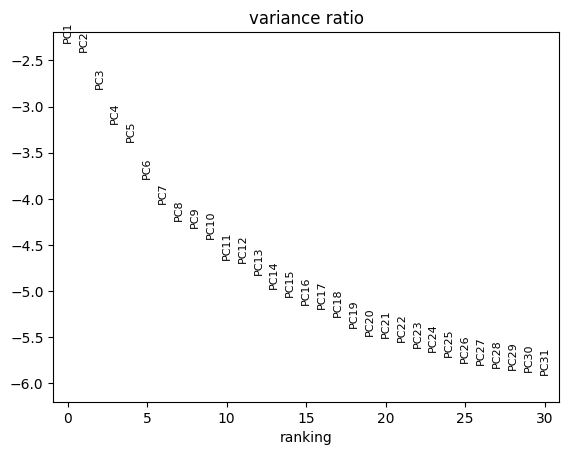

/Users/silviachen/miniconda3/envs/scta/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


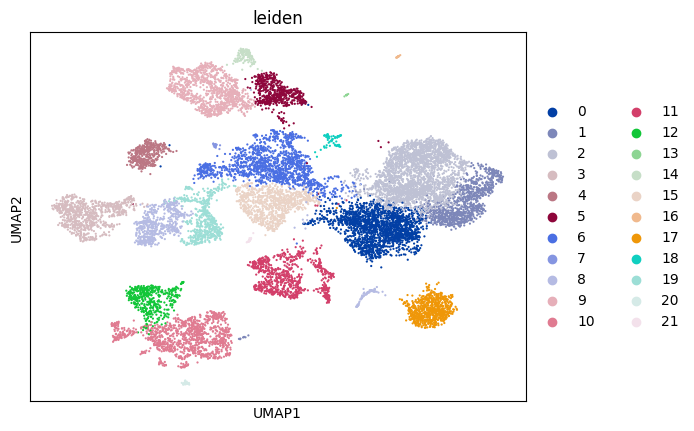

Ranking genes grouped by 'leiden' using method 'wilcoxon'...



Top 3 marker genes per 'leiden' cluster:
Cluster 0: IL7R, B2M, RPS27
Cluster 1: GZMA, NKG7, B2M
Cluster 2: CCL4, LINC01871, BTG1
Cluster 3: NPY, KLK3, PCA3
Cluster 4: TPSAB1, CPA3, MS4A2
Cluster 5: SPARCL1, IGFBP7, VIM
Cluster 6: CLDN4, ELF3, WFDC2
Cluster 7: CXCL1, LTF, CXCL2
Cluster 8: MSMB, KLK2, KLK3
Cluster 9: VWF, SPARCL1, GNG11
Cluster 10: HLA-DRA, HLA-DPA1, HLA-DPB1
Cluster 11: IGFBP7, CALD1, MYL9
Cluster 12: S100A9, LYZ, CTSS
Cluster 13: SCGB3A1, SCGB1A1, ASS1
Cluster 14: CLDN5, KCTD12, VEGFC
Cluster 15: KRT19, PERP, KRT5
Cluster 16: KRT13, TACSTD2, KRT15
Cluster 17: CD79A, MS4A1, BANK1
Cluster 18: HBA2, HBB, HBA1
Cluster 19: MSMB, KLK3, KLK2
Cluster 20: OLFM4, SCGB3A1, LCN2
Cluster 21: SCGB1A1, PTGDS, S100P
Cells: 14838, Genes: 4000
Available layers: []
Obsm keys: ['X_pca', 'X_umap']

=== obs metadata (for visualization) ===
[CAT] label (8 categories) → ['P3t', 'P2t', 'P1n', 'P4n', 'P3n', 'P4t', 'P2n', 'P1t']
[CAT] group (2 categories) → ['Tumor', 'Normal']
[CAT] source_file

In [1]:
%reset -f
import psutil
process = psutil.Process()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils_agent import (
    filter_cells,
    normalize_log_transform,
    filter_lowqc_cells,
    save_high_var_gene,
    pca_and_plot_umap,
    get_top_marker_genes,
    quick_inspect_adata
)

# Load data
adata = sc.read_h5ad('/Users/silviachen/Documents/Software/test_agent/SCTA/tumor_adata.h5ad')

# Quality control and filter data
filter_cells(adata)
adata = filter_lowqc_cells(adata)

# Normalize and log transform
normalize_log_transform(adata)

# Save highly variable genes
adata = save_high_var_gene(adata)

# PCA and UMAP computation
pca_and_plot_umap(adata)

# Get top marker genes
get_top_marker_genes(adata)

# Quick inspect adata
quick_inspect_adata(adata)

# Save processed data
adata.write('adata_preprocessed.h5ad')


In [2]:
%reset -f
import psutil
process = psutil.Process()
# Import necessary libraries
import scanpy as sc
import pandas as pd
from utils_agent import assign_cell_categories, assign_cell_subtype, quick_inspect_adata

# Load the preprocessed AnnData object
adata = sc.read_h5ad("adata_preprocessed.h5ad")

# Rename the sample groups column to 'group' if necessary
if "group" not in adata.obs.columns:
    adata.obs.rename(columns={"group": "group"}, inplace=True)

# Define cell types based on top-expressed genes and biological context
cluster_to_category = {
    "0": "T cells",
    "1": "NK cells",
    "2": "Macrophages",
    "3": "Luminal epithelial cells",
    "4": "Mast cells",
    "5": "Stromal cells",
    "6": "Basal epithelial cells",
    "7": "Fibroblasts",
    "8": "Secretory epithelial cells",
    "9": "Endothelial cells",
    "10": "B cells",
    "11": "Fibroblasts",
    "12": "Myeloid cells",
    "13": "Club cells",
    "14": "Endothelial cells",
    "15": "Basal epithelial cells",
    "16": "Suprabasal epithelial cells",
    "17": "B cells",
    "18": "Erythroid cells",
    "19": "Secretory epithelial cells",
    "20": "Goblet cells",
    "21": "Club cells"
}

# Assign the major lineage categories using the defined dictionary
adata = assign_cell_categories(adata, cluster_to_category=cluster_to_category)

# Show insights for further analysis using pd.crosstab
cross_tab = pd.crosstab(adata.obs["cell_category"], adata.obs["group"])
print(cross_tab)

# Define detailed subtypes based on DEG analysis
cluster_to_subtype = {
    "0": "CD4+ T cells",
    "1": "Cytotoxic NK cells",
    "2": "M1 Macrophages",
    "3": "Luminal cells - KLK3+",
    "4": "Activated Mast cells",
    "5": "Cancer-associated fibroblasts",
    "6": "Basal cells - CK5+",
    "7": "Myofibroblasts",
    "8": "Prostatic epithelial cells",
    "9": "Blood vascular endothelial cells",
    "10": "Naive B cells",
    "11": "CAF - IGFBP7+",
    "12": "Monocytes",
    "13": "Bronchial club cells",
    "14": "Lymphatic endothelial cells",
    "15": "Basal cells - Keratin 5+",
    "16": "Keratinized epithelial cells",
    "17": "Memory B cells",
    "18": "Mature erythrocytes",
    "19": "Prostatic secretory cells",
    "20": "Intestinal goblet cells",
    "21": "Bronchiolar club cells"
}

# Assign the detailed subtypes using the defined dictionary
assign_cell_subtype(adata, cluster_to_subtype=cluster_to_subtype)

# Save the annotated AnnData object
adata.write_h5ad("adata_annotated.h5ad")


... storing 'leiden' as categorical


... storing 'cell_category' as categorical


... storing 'subtype' as categorical


group                        Normal  Tumor
cell_category                             
B cells                        1032    860
Basal epithelial cells         1709    508
Club cells                       29      0
Endothelial cells               709    421
Erythroid cells                  53     10
Fibroblasts                     625    164
Goblet cells                     29      0
Luminal epithelial cells          2    790
Macrophages                    1011   1439
Mast cells                      204    193
Myeloid cells                   239    189
NK cells                        499    476
Secretory epithelial cells      416    713
Stromal cells                   477     95
Suprabasal epithelial cells      16      0
T cells                         845   1085


In [3]:
%reset -f
import psutil
process = psutil.Process()
# Import necessary modules
import anndata
import logging
import pandas as pd
from utils_agent import get_gene_by_disease

# Suppress specific logging messages
logging.getLogger('fontTools.subset').setLevel(logging.ERROR)

# Load the data
adata = anndata.read_h5ad("adata_annotated.h5ad")

# Define disease subtypes to study, excluding the "Normal" group
to_study = list(adata.obs['group'].cat.categories)
to_study.remove("Normal")  # Assuming "Normal" is the control type
control_type = "Normal"

# Define the cell types worth further analysis
# Based on significance in the context of prostate adenocarcinoma
cell_types_to_analyze = [
    "Basal epithelial cells", "Luminal epithelial cells", "Macrophages", 
    "Secretory epithelial cells", "T cells"
]

# Save a copy for each disease subtype with the control type
sub_adata_lists = []
for subtype in to_study:
    sub_adata = adata[adata.obs['group'].isin([control_type, subtype])].copy()
    sub_adata_lists.append(sub_adata)

# Iterate over each disease subtype adata and obtain the potential gene set
for curr_adata, curr_group in zip(sub_adata_lists, to_study):
    potential_gene_set = get_gene_by_disease(adata, curr_adata, curr_group, cell_types_to_analyze, control_type=control_type)
    print(f"{curr_group}: {potential_gene_set}")


                Gene_set                                     Term Overlap  \
163  KEGG_mouse_2019.gmt                          Prostate cancer    7/97   
204  KEGG_mouse_2019.gmt  Transcriptional misregulation in cancer   9/183   
166  KEGG_mouse_2019.gmt                  Proteoglycans in cancer   9/203   
32   KEGG_mouse_2019.gmt                           Bladder cancer    4/41   
120  KEGG_mouse_2019.gmt                   MAPK signaling pathway  10/294   
..                   ...                                      ...     ...   
154  KEGG_mouse_2019.gmt                                Phagosome   1/180   
44   KEGG_mouse_2019.gmt              Chemokine signaling pathway   1/197   
197  KEGG_mouse_2019.gmt                            Thermogenesis   1/231   
93   KEGG_mouse_2019.gmt         Herpes simplex virus 1 infection   2/433   
134  KEGG_mouse_2019.gmt  Neuroactive ligand-receptor interaction   1/348   

      P-value  Adjusted P-value  Odds Ratio  Combined Score  \
163  0.00006